<h1>Transverse Laser Beam Intensity Distribution Analisys</h1>

<h5>Description</h5>
<p>Apart from enhancing the brightness of the master beam, solid state laser amplifier also distorts transverse beam intensity distribution due to uneven gain across the rod. This notebook is aimed to figure out gain map of the laser amplifier based on intensity distributions of the beam obtained from <a href=\"https://en.wikipedia.org/wiki/Charge-coupled_device">CCD camera</a> during the experiment.</p>
<p>The wavelength of a laser beam is 1064 nm, it is emitted by q-switched <a href=\"https://en.wikipedia.org/wiki/Nd:YAG_laser">Nd:YAG</a> laser. The amplifier has also a Nd:YAG rod surrounded by laser diode arrays for pumping. </p> 

<h5>Import libraries</h5>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sb

<h5>Import and clean csv files</h5>
<p>Import master beam csv file using pandas:</p>

In [33]:
master_pulse = pd.read_table('data_preamp/small_signal_gain/master_0.19mJ.csv', sep=',', \
              header = None)

print(f'The dimensions of the dataframe is {master_pulse.shape}')

master_pulse.head()

The dimensions of the dataframe is (656, 993)


,0,1,2,3,4,5,6,7,8,9,...,983,984,985,986,987,988,989,990,991,992
0,-39.796875,45.875000,-4.453125,12.796875,-22.546875,-25.156250,-22.421875,48.250000,14.484375,-13.921875,...,2.625000,-21.109375,22.265625,-0.828125,48.937500,38.390625,-4.359375,-18.375000,-16.921875,NaN
1,-0.265625,-14.625000,-71.921875,-72.734375,-48.687500,-18.718750,-37.515625,-23.203125,-16.109375,11.125000,...,-16.546875,-96.984375,-21.531250,-78.312500,17.468750,-72.640625,55.234375,-36.968750,17.140625,NaN
2,72.156250,12.390625,-19.015625,56.875000,55.750000,49.578125,-13.593750,-9.265625,11.093750,-31.343750,...,22.046875,-10.984375,5.875000,42.140625,-63.171875,-6.171875,-17.406250,26.625000,-7.187500,NaN
3,-8.703125,-11.468750,-32.453125,23.625000,-5.781250,-33.906250,16.437500,-35.375000,-26.093750,41.609375,...,2.187500,-21.203125,-42.218750,-89.734375,-6.140625,-31.906250,-56.093750,37.203125,-78.671875,NaN
4,38.859375,23.000000,-45.796875,-19.671875,90.875000,-19.046875,17.734375,-18.187500,-16.718750,-56.140625,...,-81.765625,-12.000000,-7.109375,26.453125,-59.890625,95.750000,-8.156250,7.250000,-53.234375,NaN


<p>Clean master beam profile from non-numeric values:</p>

In [34]:
#drop last column with Nan values
last_column_number = master_pulse.shape[1] - 1
print(last_column_number)
master_pulse = master_pulse.drop(master_pulse.columns[last_column_number],\
                                 axis = 1,)

master_pulse.head()

992


,0,1,2,3,4,5,6,7,8,9,...,982,983,984,985,986,987,988,989,990,991
0,-39.796875,45.875000,-4.453125,12.796875,-22.546875,-25.156250,-22.421875,48.250000,14.484375,-13.921875,...,-7.875000,2.625000,-21.109375,22.265625,-0.828125,48.937500,38.390625,-4.359375,-18.375000,-16.921875
1,-0.265625,-14.625000,-71.921875,-72.734375,-48.687500,-18.718750,-37.515625,-23.203125,-16.109375,11.125000,...,-39.671875,-16.546875,-96.984375,-21.531250,-78.312500,17.468750,-72.640625,55.234375,-36.968750,17.140625
2,72.156250,12.390625,-19.015625,56.875000,55.750000,49.578125,-13.593750,-9.265625,11.093750,-31.343750,...,-115.000000,22.046875,-10.984375,5.875000,42.140625,-63.171875,-6.171875,-17.406250,26.625000,-7.187500
3,-8.703125,-11.468750,-32.453125,23.625000,-5.781250,-33.906250,16.437500,-35.375000,-26.093750,41.609375,...,-21.453125,2.187500,-21.203125,-42.218750,-89.734375,-6.140625,-31.906250,-56.093750,37.203125,-78.671875
4,38.859375,23.000000,-45.796875,-19.671875,90.875000,-19.046875,17.734375,-18.187500,-16.718750,-56.140625,...,18.578125,-81.765625,-12.000000,-7.109375,26.453125,-59.890625,95.750000,-8.156250,7.250000,-53.234375


<p>Import amplified beam profile and clean from non-numeric values:</p>

In [35]:
amplified_pulse = pd.read_table('data_preamp/small_signal_gain/amplified_2.7mJ.csv', \
                                sep=',',header = None)

print(f'The dimensions of the dataframe is {amplified_pulse.shape}')

amplified_pulse = amplified_pulse.drop(amplified_pulse.columns[last_column_number],\
                                         axis = 1,)

amplified_pulse.head()

The dimensions of the dataframe is (656, 993)


,0,1,2,3,4,5,6,7,8,9,...,982,983,984,985,986,987,988,989,990,991
0,143.203125,155.875000,272.546875,240.796875,206.453125,265.843750,236.578125,267.250000,201.484375,186.078125,...,196.125000,126.625000,121.890625,181.265625,188.171875,49.937500,75.390625,101.640625,176.625000,97.078125
1,276.734375,200.375000,209.078125,233.265625,288.312500,211.281250,333.484375,244.796875,250.890625,272.125000,...,101.328125,85.453125,129.015625,121.468750,57.687500,159.468750,141.359375,27.234375,77.031250,132.140625
2,164.156250,227.390625,266.984375,221.875000,281.750000,273.578125,269.406250,262.734375,256.093750,179.656250,...,145.000000,67.046875,71.015625,119.875000,119.140625,75.828125,20.828125,83.593750,143.625000,144.812500
3,311.296875,258.531250,254.546875,334.625000,236.218750,218.093750,248.437500,239.625000,254.906250,190.609375,...,126.546875,126.187500,139.796875,68.781250,65.265625,137.859375,161.093750,145.906250,82.203125,73.328125
4,237.859375,233.000000,239.203125,207.328125,326.875000,156.953125,300.734375,189.812500,187.281250,256.859375,...,80.578125,133.234375,173.000000,110.890625,97.453125,136.109375,107.750000,8.843750,130.250000,70.765625


<p>Now we have two dataframes of identical size. To estimate intensity values of the signal it is convinient to plot one column from the center of the beam profile (central vertical pixel row).</p>

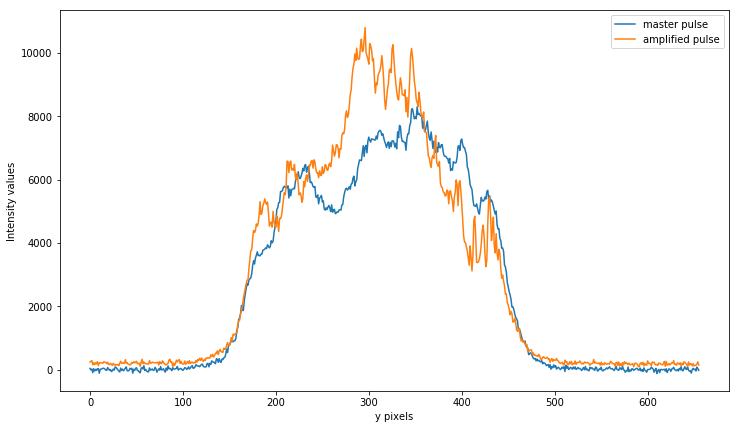

In [36]:
plt.figure(figsize=(12,7))
plt.plot(master_pulse[last_column_number / 2], \
         label = 'master pulse')
plt.plot(amplified_pulse[last_column_number / 2], \
         label = 'amplified pulse')
plt.legend(loc = 'upper right')
plt.xlabel('y pixels')
plt.ylabel('Intensity values')
plt.show()

<p>The graph above does not display the real intensity ratio because the sensitivity of the sensor has been changed for amplified beam measurement. Giving the fact that amplified pulse energy equals approximatly two times the enegy of master beam we should multiply amplified dataframe by two.</p>

In [37]:
master_p_energy = 0.19
amplified_p_energy = 2.7
magnification_factor = amplified_p_energy / master_p_energy
amplified_pulse = pd.DataFrame(amplified_pulse.values * magnification_factor,\
                               columns = amplified_pulse.columns,\
                               index = amplified_pulse.index)


<p>Plot central pixel row again and both maps:</p>

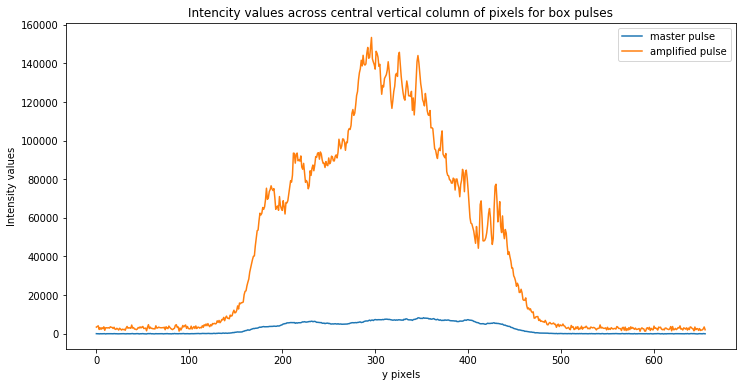

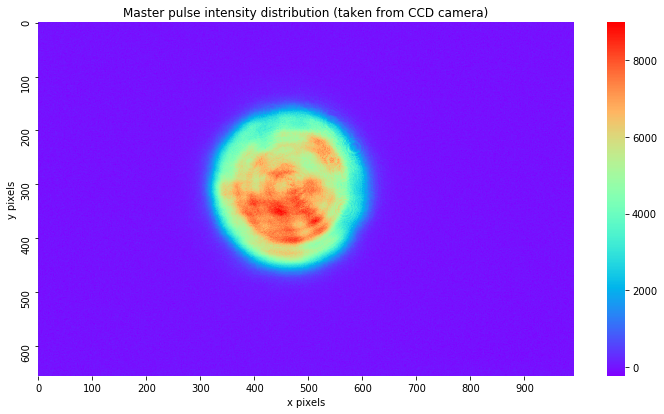

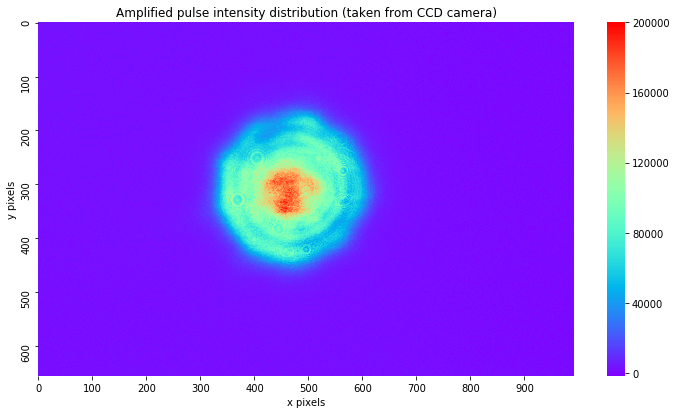

In [38]:
plt.figure(figsize=(12,6))
plt.plot(master_pulse[last_column_number / 2], label = 'master pulse')
plt.plot(amplified_pulse[last_column_number / 2], label = 'amplified pulse')
plt.legend(loc = 'upper right')
plt.xlabel('y pixels')
plt.ylabel('Intensity values')
plt.title('Intencity values across central vertical column of pixels for box pulses')
plt.show()


plt.figure(figsize=(12, 6.5))
master_pulse_map = sb.heatmap(master_pulse, xticklabels = 100, \
                              yticklabels = 100, \
                              cmap = 'rainbow')
plt.title('Master pulse intensity distribution (taken from CCD camera)')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.show()

plt.figure(figsize=(12, 6.5))
amplified_pulse_map = sb.heatmap(amplified_pulse, xticklabels = 100, \
                                 yticklabels = 100, \
                                 cmap = 'rainbow')
plt.title('Amplified pulse intensity distribution (taken from CCD camera)')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.show()

<h5>Calculate gain distribution across the amplifier rod</h5>
<p>To figure out "gain" distribution across the amplifier rod we should divide amplified pulse dataframe values by master pulse dataframe values. To accomplish this we should filter zero and negative values from both dataframes.</p>

In [56]:
filter_value = 400

mask = master_pulse < filter_value
master_pulse.iloc[mask] = filter_value

mask_amp = amplified_pulse < filter_value
amplified_pulse.iloc[mask] = filter_value

<h5>Plot gain distribution across the amplifier rod</h5>
<p>Calculate gain values by dividing amplified_pulse dataframe by master_pulse dataframe:</p>

In [57]:
gain_values = pd.DataFrame(amplified_pulse.values / master_pulse.values,\
                           columns = amplified_pulse.columns,\
                           index = amplified_pulse.index)

<p>Plot central pixel row of gain values dataframe.</p>

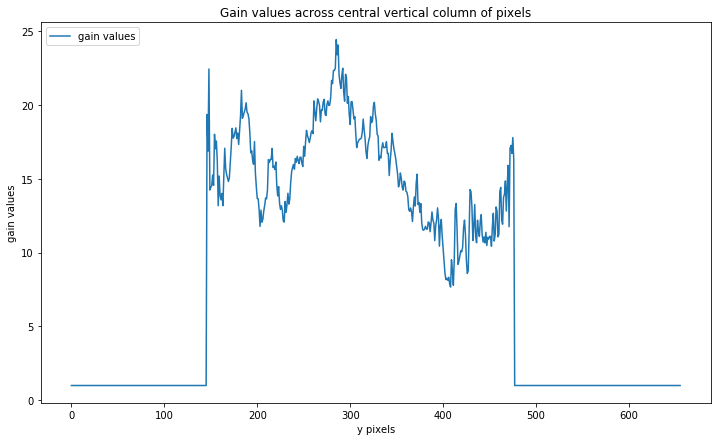

In [58]:
plt.figure(figsize=(12, 7))
plt.plot(gain_values[last_column_number / 2], label = 'gain values')
plt.legend(loc = 'upper left')
plt.xlabel('y pixels')
plt.ylabel('gain values')
plt.title('Gain values across central vertical column of pixels')
plt.show()

<p>Clear gain map from negative values for enhanced color representation:</p>

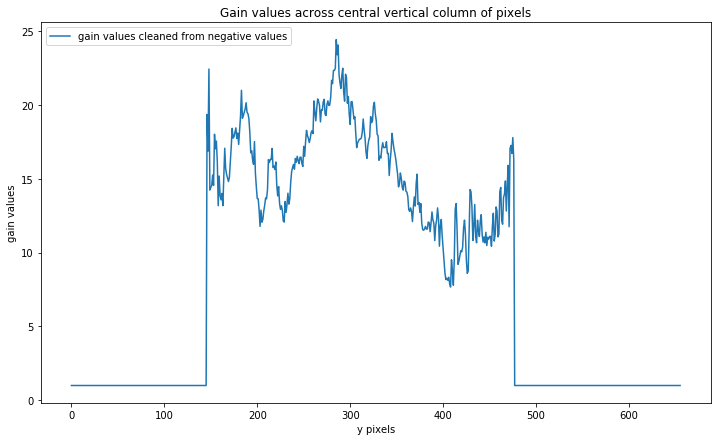

In [59]:
filter_value = 1

mask = gain_values < filter_value
gain_values.iloc[mask] = filter_value

plt.figure(figsize=(12, 7))
plt.plot(gain_values[last_column_number / 2], label = 'gain values cleaned from negative values')
plt.legend(loc = 'upper left')
plt.title('Gain values across central vertical column of pixels')
plt.xlabel('y pixels')
plt.ylabel('gain values')
plt.show()

<p>Make a 2d map of gain values using seaborn library:</p>

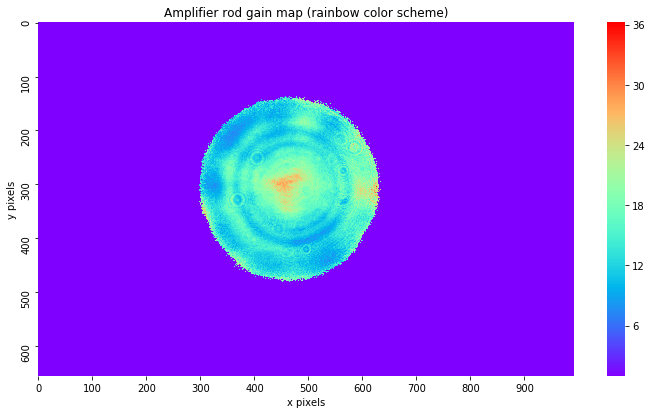

In [60]:
plt.figure(figsize=(12, 6.5))
gain_values_map = sb.heatmap(gain_values, xticklabels = 100, \
                             yticklabels = 100, \
                             cmap = 'rainbow')
plt.title('Amplifier rod gain map (rainbow color scheme)')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.show()

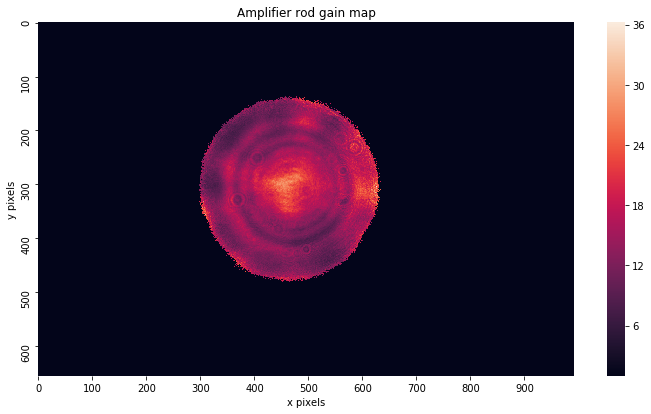

In [61]:
plt.figure(figsize=(12, 6.5))

gain_values_map = sb.heatmap(gain_values, xticklabels = 100, \
                             yticklabels = 100)
plt.title('Amplifier rod gain map')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.title('Amplifier rod gain map')
plt.show()

<p>Make a 3d surface plot of gain values. <b>Takes about 5 minutes on my macbook air.</b></p>

In [62]:
#%%time

# transform gain values to long format
#gain_values_long = gain_values.unstack().reset_index()
#gain_values_long.columns=["X pixels","Y pixels","Intencity"]
#gain_values_long.head()

#make the plot
#fig = plt.figure(figsize=(19, 11))
#ax = fig.gca(projection='3d')
#ax.plot_trisurf(gain_values_long['Y pixels'], gain_values_long['X pixels'], \
#                gain_values_long['Intencity'], cmap=plt.cm.viridis, \
#                linewidth=0.2)
#plt.show()


#ax.view_init(30, 45)
#plt.show()

<h5>Conclusion</h5>
<p>We have successfully created a gain map which reveals the disadvantages of amplifier chamber design. The main problem of obtained gain distribution is a number of so-called "hot" areas close to the edge of the active medium with gain values 7.5 and higher. The everage gain value in the areas closer to the center of the medium is about 3.5. What's also not very good about this particular distribution is that you can actually see traces of pump radiation from different laser diodes.</p>
<p>The obtained gain map will be used to fix the chamber design.</p>
<p>An important note. The data obtained from the experiment is not ideal for this kind of task due to the energy of the master beam. In our case the central "core" of the beam completely depleted inverted population density in the rod, causing gain saturation. To create an accurate gain map we have to use flat-top master beam of very low energy.</p>